## 변이형 오토인코더

변이형 오토인코더는 생성 모델의 한 종류로 개념 벡터를 사용하여 이미지를 변형하는 데 아주 적절하다.  변이형 오토인코더는 입력을 저차원 잠재 공간으로 인코딩한 후 디코딩하여 복원하는 네트워크이다. 변이형 오토인코더는 딥러닝과 베이즈추론의 아이디어를 혼합한 오토인코더의 최신 버저닝다.

고전적인 오토인코더는 이미지를 입력받아 인코더 모듈을 사용하여 잠재 벡터 공간으로 매핑한다. 그다음 디코더 모듈을 사용해서 원본 이미지와 동일한 차원으로 복원하여 출력한다. 오토인코더는 입력 이미지와 동일한 이미지를 타깃 데이터로 사용하여 훈련한다. 다시 말해 오토인코더는 원본 입력을 재구성하는 방법을 학습한다 코딩(인코더의 출력)에 여러 제약을 가하면 오토인코더가 더 흥미로운 또는 덜 흥미로운 잠재 공간의 표현을 학습한다. 일반적으로 코딩이 저차원잉고 희소(0이 많이)하도록 제약을 가한다. 이런 경우 인터코더는 입력 데이터의 정보를 적은 수의 비트에 압축하기 위해 노력한다.

![](https://camo.githubusercontent.com/6b3a82f1742f49dbce59dddc849ad9578b884dd5/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368382f6175746f656e636f6465722e6a7067)

현실적으로 이런 전통적인 오토인코더는 특별히 유용하거나 구조화가 잘된 잠재 공간을 만들지 못한다. 압축도 아주 뛰어나지 않는다. 이런 이유 때문에 시대의 흐름에서 대부분 멀어졌다. VAE는 오토인코더에 약간의 통계 기법을 추가하여 연속적이고 구조적인 잠재 공간을 학습하도록 만들었다. 결국 이미지 생성을 위한 강력한 도구로 탈바꿈되었다.

입력 이미지를 잠재 공간의 고정된 코딩으로 압축하는 대신 VAE는 이미지를 어떤 통계 분포의 파라미터로 변환한다. 이는 입력 이미지가 통계적 과정을 통해서 생성되었다고 가정하여 인코딩과 디코딩하는 동안 무작위성이 필요하다는 것을 의미한다. VAE는 평균과 분산 파라미터를 사용하여 이 분포에서 무작위로 하나의 샘플을 추출한다. 이 샘플을 디코딩하여 원본 입력을 복원한다. 이런 무작위한 과정은 안정성을 향상하고 잠재 공간 어디서든 의미 있는 표현을 인코딩하도록 만든다. 즉 잠재 공간에서 샘플링한 모든 포인트는 유효한 출력으로 디코딩된다.

![](https://camo.githubusercontent.com/6212b350e2cd3638521979c53f73a029f164a14a/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368382f7661652e706e67)

기술적으로 보면 VAE는 다음과 같이 작동한다.

1. 인코더 모듈이 입력 샘플 input_img를 잠재 공간의 두 파라미터 z_mean과 z_log_var로 변환한다. 
2. 입력 이미지가 생성되었다고 가정한 잠재 공간의 정규 분포에서 포인트 z를 z = z_mean + exp(0.5 * z_log_var) * epsilon처럼 무작위로 샘플링한다. epsilon은 작은 값을 가진 랜덤 텐서이다.
3. 디코더 모듈은 잠재 공간의 이 포인트를 원본 입력 이미지로 매핑하여 복원한다.

epsilon이 무작위로  만들어지기 때문에 input img를 인코딩한 잠재 공간의 위치(z_mean)에 가까운 포인트는 input_img와 비슷한 이미지로 디코딩될 것이다. 이는 잠재 공간을 연속적이고 의미 있는 공간으로 만들어 준다. 잠재 공간에서 가까운 2개의 포인트는 아주 비슷한 이미지로 디코딩될 것이다. 잠재 공간의 이런 저차원 연속성은 잠재 공간에서 모든 방향이 의미 있는 데이터 변환의 축을 인코딩하도록 만든다. 결국 잠재 공간은 매우 구조적이고 개념 벡터로 다루기에 적합하다. 

VAE의 파라미터는 2개의 손실 함수로 훈련합니다. 디코딩된 샘플이 원본 입력과 동일하도록 만드는 재구성 손실과 잠재 공간을 잘 형성하고 훈련 데이터에 과대적합을 줄이는 규제 손실이다. 케라스의 VAE 구현을 간단히 살펴보겠다. 개략적으로 보면 다음과 같다.

```
z_mean, z_log_var = encoder(input_img)

z = z_mean + exp(0.5 * z_log_var) * epsilon

reconstructed_img = decoder(z)

model = Model(input_img, reconstructed_img)
```

그다음 이 모델을 재구성 손실과 규제 손실을 사용하여 훈련한다.

다음 코드는 이미지를 잠재 공간상 확률 분포 파라미더로 매핑하는 인코더 네트워크이다. 입력 이미지  x를 두 벡터 z_mean과 z_log_var로 매핑하는 간단한 컨브넷이다.

##  VAE 인코더

In [2]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

In [3]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2,2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

다음으로 z_mean과 z_log_var를 사용하는 코드이다. 이 두 파라미터가 input_img를 생성한 통계 분포의 파라미터라 가정하고 잠재 공간 포인트 z를 생성한다. 여기서 (케라스의 백엔드 기능으로 만든) 일련의 코드를 Lambda층으로 감싼다. 케라스에서는 모든 것이 층이므로 기본 층을 사용하지 않은 코드는 Lambda로 (또는 직접 만든 층으로) 감싸야 한다.

In [5]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                     mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

## 디코더 네트워크

벡터 z를 이전 특성 맵 차원으로 크기를 바꾸고 몇 개의 합성곱 층을 사용하여 최종 출력 이미지를 만든다. 최종 이미지는 원본 input_img와 차원이 같다.

In [6]:
decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,
                           padding='same',
                           activation='relu',
                           strides=(2,2))(x)

x = layers.Conv2D(1, 3,
                  padding='same',
                  activation='sigmoid')(x)

decoder = Model(decoder_input, x)

z_decoded = decoder(z)

일반적인 샘플 기준의 함수인 loss(y_true, y_pred) 형태는 VAE의 이중 손실에 맞지 않는다. add_loss 내장 메서드를 사용하는 층을 직접 만들어 임의의 손실을 정의하겠다.

In [7]:
class CustomVariationalLayer(keras.layers.Layer):
    
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)
    
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
y = CustomVariationalLayer()([input_img, z_decoded])

이제 모델 객체를 만들고 훈련할 준비가 되었다. 츠엥서 손실을 직접 다루기 때문에 compile메서드에서 손실을 지정하지 않는다(loss=None). 그 결과 훈련하는 동안 타깃 데이터를 전달하지 않아도 된다.

In [8]:
from keras.datasets import mnist

In [9]:
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [10]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test  = x_test.astype('float32') / 255.
x_test  = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.2131 - val_loss: 0.1969
Epoch 2/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.1937 - val_loss: 0.1906
Epoch 3/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.1890 - val_loss: 0.1884
Epoch 4/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.1867 - val_loss: 0.1865
Epoch 5/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.1851 - val_loss: 0.1844
Epoch 6/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.1839 - val_loss: 0.1844
Epoch 7/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.1830 - val_loss: 0.1830
Epoch 8/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.1822 - val_loss: 0.1826
Epoch 9/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.1817 - val_

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


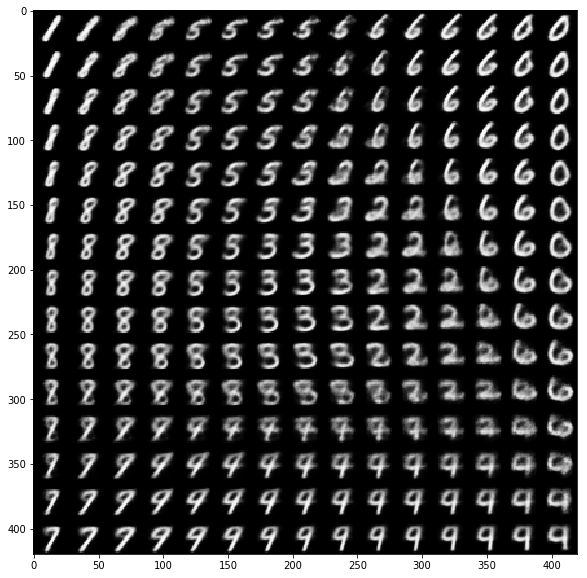

In [13]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()
